In [9]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

### Load Recast Data

In [10]:
files = {'ATLAS-SUSY-2018-13' :'../results_dataFrames/pp2BB1j_2018_13_New.pcl',
         'ATLAS-SUSY-2016-08' :'../results_dataFrames/pp2BB1j_2016_08_New.pcl'}

recastDataDict = {label : pd.read_pickle(f) for label,f in files.items()}

msb = 'mLLP'
mn1= 'mLSP'
tau = 'tau_ns'

### Plot luminosity for each sample

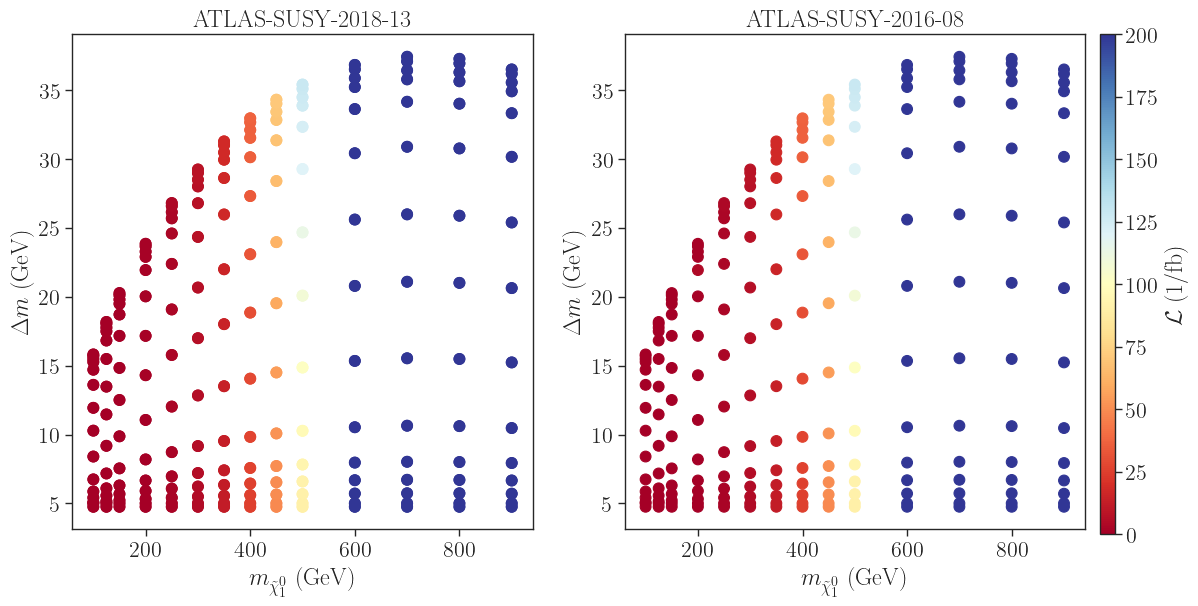

In [11]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(15,5))

for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]
    y = recastData[msb]-recastData[mn1]
    x = recastData[mn1]
    mcEvents = recastData['Total MC Events']
    xsec = recastData['Total xsec (pb)']
    lumi = mcEvents/(1e3*xsec)
    p = ax.scatter(x=x,y=y,vmin=0.0,vmax=200.0,
            c=lumi,cmap=cm,s=60)
    
    ax.set_xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_ylabel(r'$\Delta m$ (GeV)')
    ax.set_title('%s' %label)

fig.subplots_adjust(right=0.8,top=1.1)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 1.0])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label=r'$\mathcal{L}$ (1/fb)',cax=cbar_ax)
# plt.tight_layout()
plt.show()

### Number of MC events for given luminosity

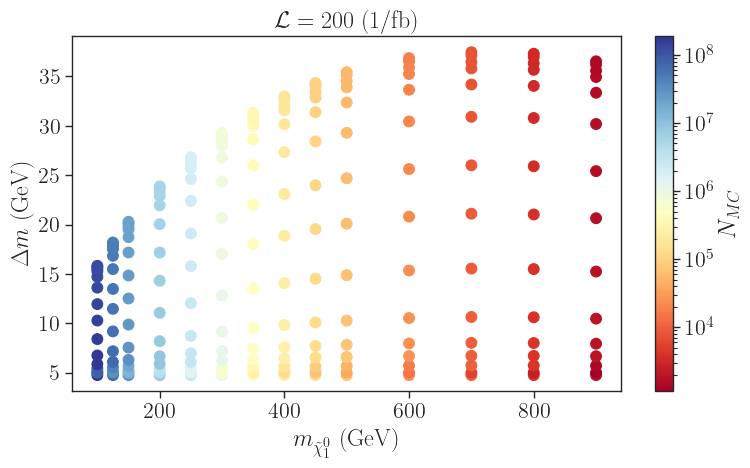

In [12]:
lumi = 200.0
fig = plt.figure(figsize=(8,5))

recastData = recastDataDict['ATLAS-SUSY-2016-08']
recastData = recastDataDict[label]
y = recastData[msb]-recastData[mn1]
x = recastData[mn1]    
xsec = recastData['Total xsec (pb)']
mcEvents = xsec*lumi*1e3
p = plt.scatter(x=x,y=y,
        c=mcEvents,cmap=cm,s=60,norm=LogNorm())

plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
plt.ylabel(r'$\Delta m$ (GeV)')
plt.title(r'$\mathcal{L} = %1.0f$ (1/fb)' %lumi)
plt.colorbar(label=r'$N_{MC}$')

plt.tight_layout()
plt.show()

### Plot MC error for each analysis

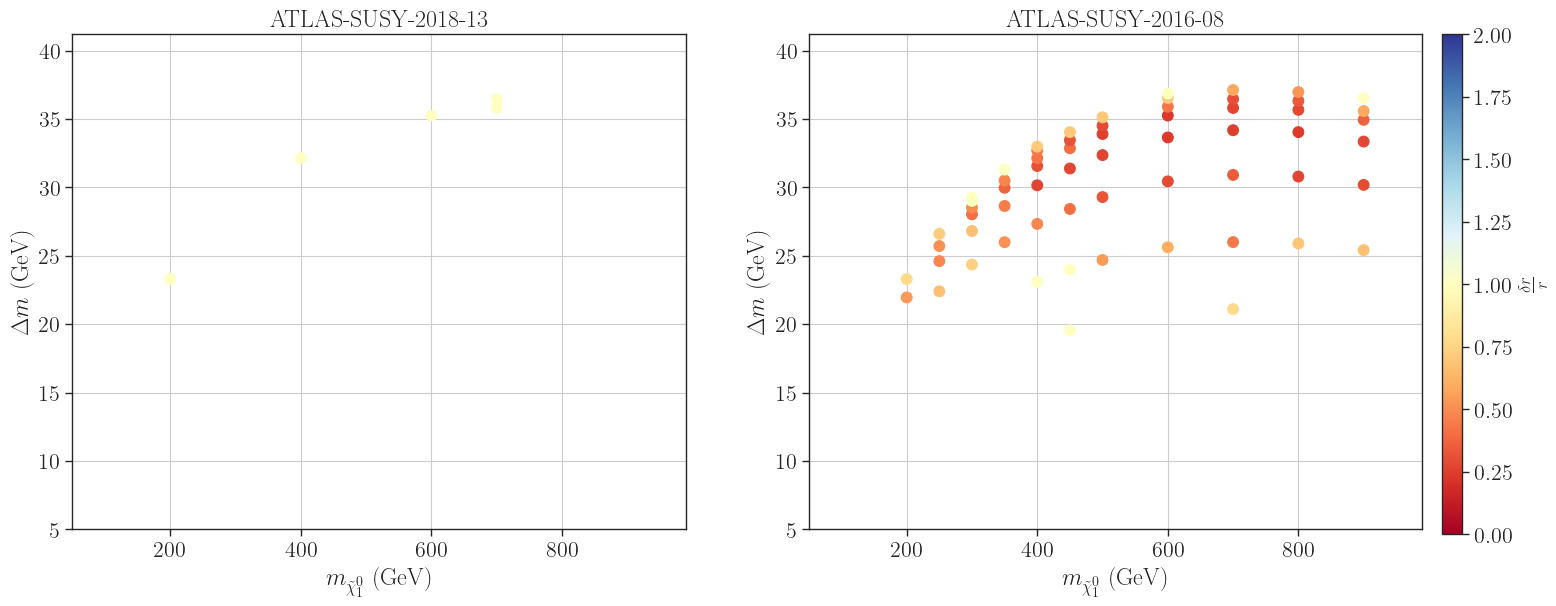

In [13]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(20,5))

for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]
    y = recastData[msb]-recastData[mn1]
    x = recastData[mn1]
    rValues = recastData['robs']
    rValuesErr = recastData['robsErr']
    ratio = rValuesErr/rValues
    p = ax.scatter(x=x,y=y,vmin=0.0,vmax=2.0,
            c=ratio,cmap=cm,s=60)
    
    ax.set_xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_ylabel(r'$\Delta m$ (GeV)')
    ax.set_title('%s' %label)
    ax.set_xlim(50.0,1.1*x.max())
    ax.set_ylim(5.0,1.1*y.max())
    ax.grid()


fig.subplots_adjust(right=0.8,top=1.1)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 1.0])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label=r'$\frac{\delta r}{r}$',cax=cbar_ax)
# plt.tight_layout()
plt.show()

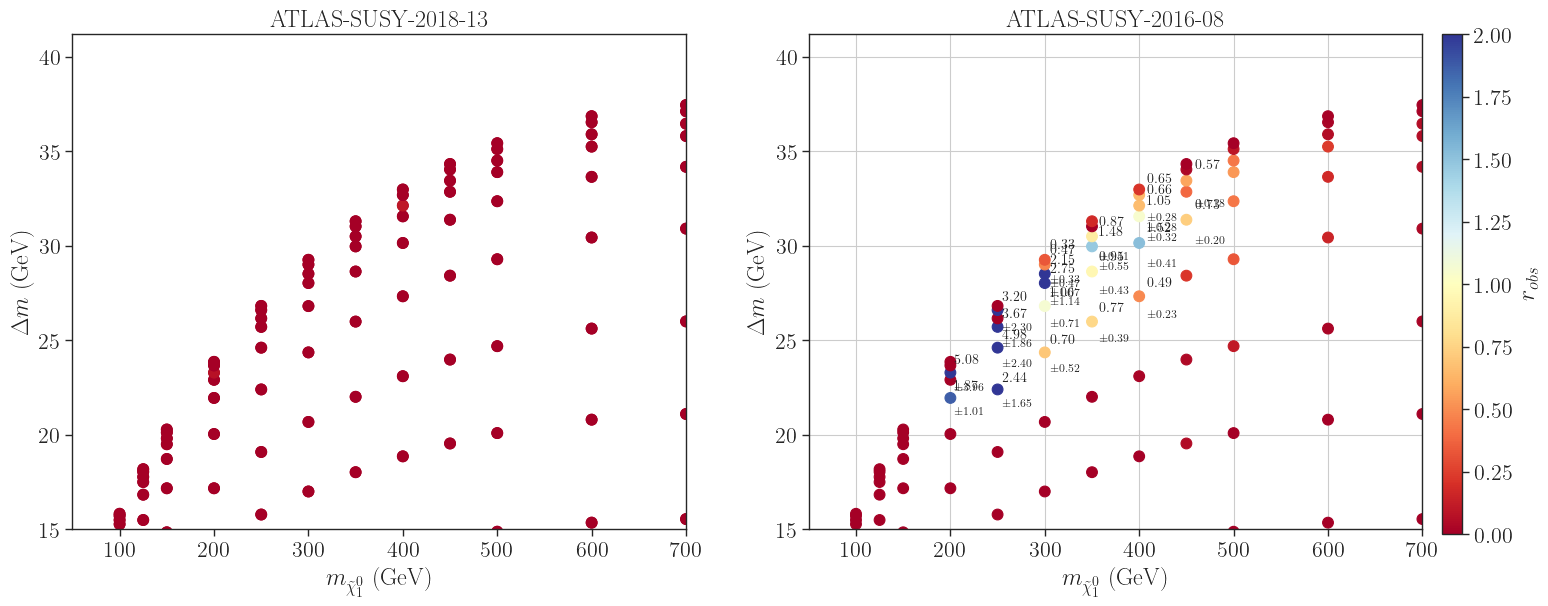

In [14]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(20,5))

low_stats = []
for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]
    y = recastData[msb]-recastData[mn1]
    x = recastData[mn1]
    tau = recastData['tau_ns']
    rValues = recastData['robs']
    rValuesErr = recastData['robsErr']
    p = ax.scatter(x=x,y=y,vmin=0.0,vmax=2.0,
            c=rValues,cmap=cm,s=60)
    
    for i,pt in enumerate(x):
        # plt.text(1.05*x[i],1.05*y[i],r'$%1.1e \pm %1.1e$' %(rValues[i],rValuesErr[i]),fontsize=5)
        if not rValues[i]:
            continue
        if rValues[i]+3*rValuesErr[i] < 1.0:
            continue
        # if rValues[i] > 1.5:
            # continue
        ax.text(1.02*x[i],1.02*y[i],r'$%1.2f$' %(rValues[i]),fontsize=10)
        ax.text(1.02*x[i],0.96*y[i],r'$\pm %1.2f$' %(rValuesErr[i]),fontsize=8)
        low_stats.append([x[i],x[i]+y[i],tau[i]])
        ax.grid()

    ax.set_xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_ylabel(r'$\Delta m$ (GeV)')
    ax.set_title('%s' %label)
    ax.set_xlim(50.0,700.0)
    ax.set_ylim(15.0,1.1*y.max())


fig.subplots_adjust(right=0.8,top=1.1)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 1.0])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label=r'$r_{obs}$',cax=cbar_ax)
# plt.tight_layout()
plt.show()

In [15]:
print(len(low_stats))

23


In [16]:
ptsIni = [("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2]) for pt in sorted(low_stats)]
print(str(ptsIni).replace("'", ""))

[(200.00, 221.95, 5.30e-02), (200.00, 223.29, 2.00e-02), (250.00, 272.40, 8.38e-02), (250.00, 274.61, 4.45e-02), (250.00, 275.71, 2.48e-02), (250.00, 276.60, 8.37e-03), (300.00, 324.36, 7.16e-02), (300.00, 326.81, 3.87e-02), (300.00, 328.03, 2.17e-02), (300.00, 328.52, 1.46e-02), (300.00, 329.01, 7.14e-03), (300.00, 329.26, 3.26e-03), (350.00, 375.99, 6.25e-02), (350.00, 378.64, 3.44e-02), (350.00, 379.97, 1.94e-02), (350.00, 380.50, 1.30e-02), (400.00, 427.33, 5.55e-02), (400.00, 430.15, 3.11e-02), (400.00, 431.56, 1.76e-02), (400.00, 432.13, 1.18e-02), (400.00, 432.69, 5.67e-03), (450.00, 481.38, 2.85e-02), (450.00, 483.45, 1.10e-02)]
